<a href="https://colab.research.google.com/github/SteevenB/ToxicCommentsClassification/blob/main/Classification_commentaires_toxiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Etude du jeu de données

Tout d'abord, il peut être intéressant de voir le nombre de commentaires négatifs selon leurs catégories ainsi que d'autres statistiques:


In [7]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ensuite, on peut également observer le nombre de mots par commentaire.
On peut remarquer ici qu'il y a moins de 1000 mots dans la plupart des cas, on peut donc se dire qu'on travaille qu'avec les commentaires de moins de 1000 mots:

(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <BarContainer object of 10 artists>)

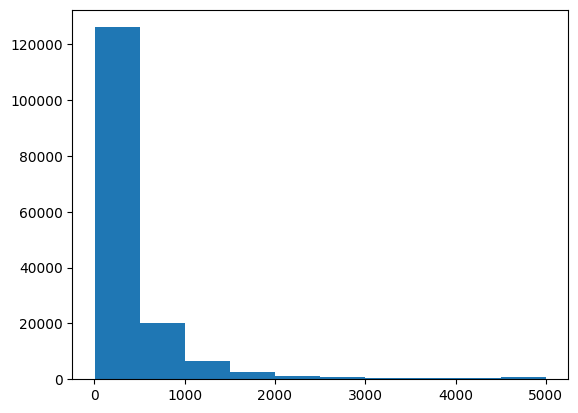

In [8]:
comment=data.comment_text.str.len()
plt.hist(comment)

On peut également voir la quantité de chaque catégorie graphiquement.
On remarque que severe_toxic pourrait potentiellement être regroupé avec toxic vu la quantité faible qu'il y a.

<Axes: >

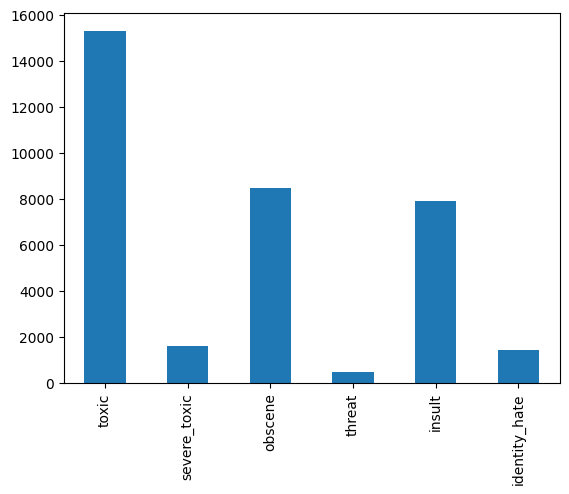

In [9]:
train_labels = data[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

label_count.plot(kind="bar")
#il y a + de toxic qu'autre chose
#regrouper severe toxic et toxic? car pas bcp de severe_toxic

On peut s'amuser à afficher les mots qui reviennent le plus selon les catégories (âmes sensibles s'abstenir):

In [10]:
#pip install wordcloud matplotlib pandas

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supposons que 'data' est votre DataFrame et qu'il contient une colonne 'text'
# et des colonnes de labels comme 'toxic', 'severe_toxic', etc.

def generate_wordcloud(data, category):
    # Combine tous les textes de la catégorie donnée
    text = " ".join(review for review in data[data[category]==1].comment_text)

    # Génère un WordCloud
    wordcloud = WordCloud(background_color="white").generate(text)

    # Affiche le WordCloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud pour la catégorie: {category}")
    plt.show()


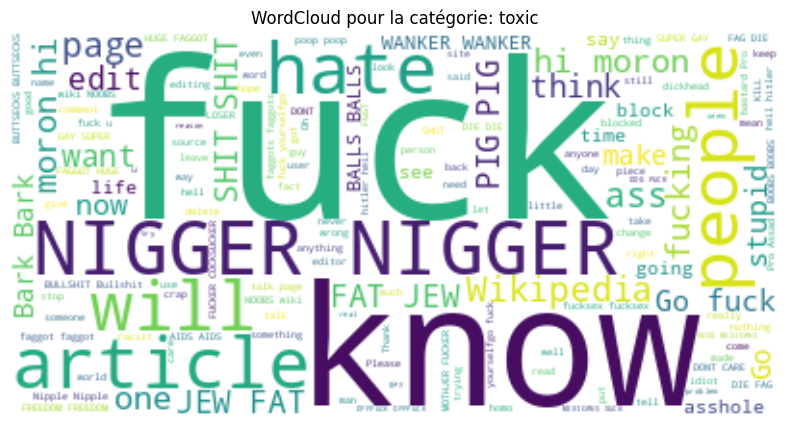

In [12]:
generate_wordcloud(data, 'toxic')

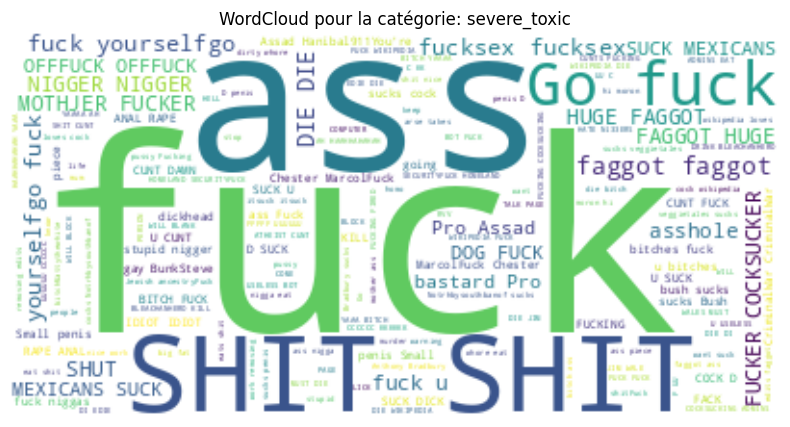

In [13]:
generate_wordcloud(data, 'severe_toxic')

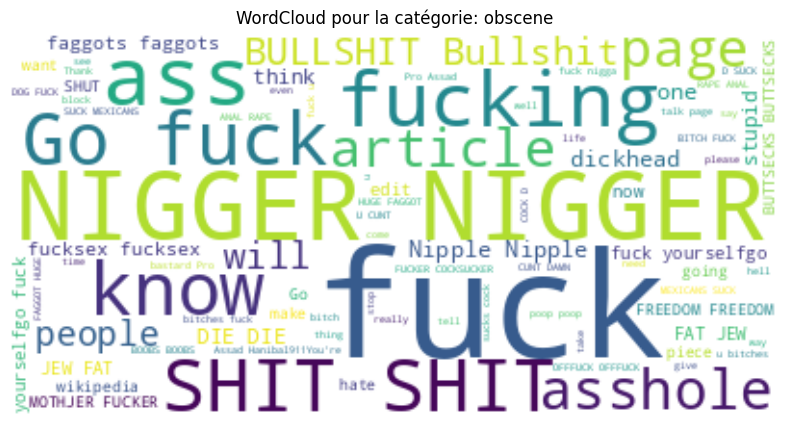

In [14]:
generate_wordcloud(data, 'obscene')

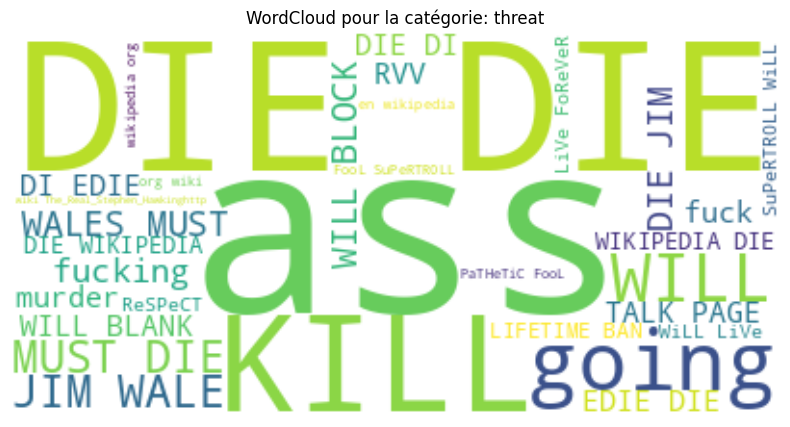

In [15]:
generate_wordcloud(data, 'threat')

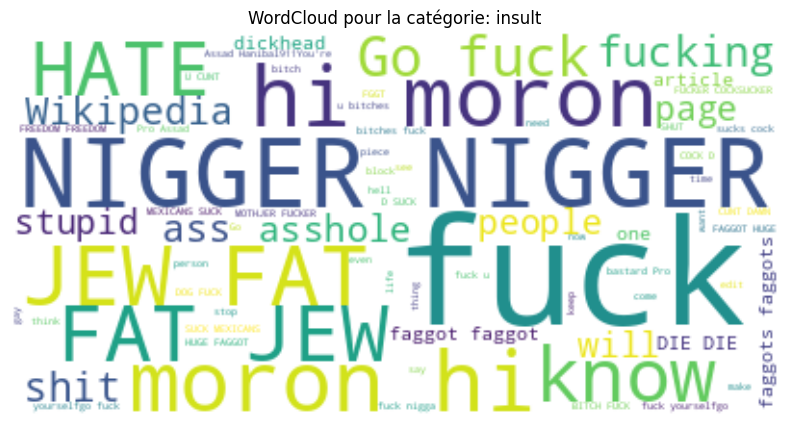

In [16]:
generate_wordcloud(data, 'insult')

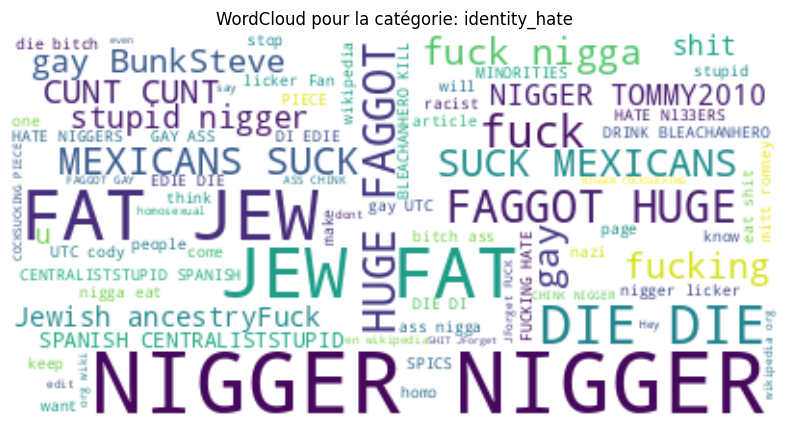

In [17]:
generate_wordcloud(data, 'identity_hate')

Pour finir sur une meilleure note, on peut remarquer que la plupart des commentaires sont positifs, et que ceux négatifs représentent seulement une petite partie:

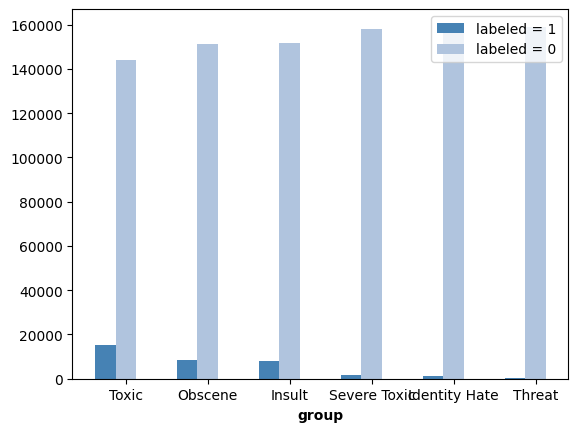

In [18]:
# Code to draw bar graph for visualising distribution of classes within each label.
# Compare negative and the rest of the comments
barWidth = 0.25

bars1 = [sum(data['toxic'] == 1), sum(data['obscene'] == 1), sum(data['insult'] == 1), sum(data['severe_toxic'] == 1),
         sum(data['identity_hate'] == 1), sum(data['threat'] == 1)]
bars2 = [sum(data['toxic'] == 0), sum(data['obscene'] == 0), sum(data['insult'] == 0), sum(data['severe_toxic'] == 0),
         sum(data['identity_hate'] == 0), sum(data['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

# Préparation des données

On va pouvoir désormais pré-traiter nos données:

In [ ]:
# Your Code


# Entraînement du modèle baseline

In [ ]:
# Your Code

# Itération de la modélisation

In [ ]:
# Your Code